In [27]:
#===============================================================
# Interpolation kis into 200*200*200*72
# Calculate the mean_PhotonSim_Pars_mu
#===============================================================
import numpy as np
from scipy.interpolate import griddata
import time
import matplotlib.pyplot as plt
%matplotlib inline

#Import PhotonSim Results
#===========================================================================
data_Whole_Detector_Weight = np.load('data/Results_Photon/data_Whole_Detector_Weight.npy')
data_Whole_Detector_kis = np.load('data/Results_Photon/data_Whole_Detector_kis.npy')
data_Whole_Detector_Weight.shape = 23,23,23,72
data_Whole_Detector_kis.shape =23,23,23,72
print(data_Whole_Detector_kis.shape)


(23, 23, 23, 72)


In [43]:
# Preparing Interpolation
#===========================================================================
array1 = np.array([-9.95,-9.5])
array2 = np.arange(-9,10,1)
array3 = np.array([9.5,9.95])
array_Sum = np.concatenate((array1,array2,array3),axis = 0)
x = array_Sum.copy()
y = array_Sum.copy()
z = array_Sum.copy()
points = np.array(np.meshgrid(x,y,z)) #Original PhotonSim grid
points.shape = 3,23*23*23
points = points.T    #I*3            # I * [z,y,x]
print(points.shape)

points1 = np.mgrid[-9.95:9.95:200j,-9.95:9.95:200j,-9.95:9.95:200j] #New grid
print(points1.shape)
points1.shape = 3,200*200*200
points1 = points1.T                   # I * [z,y,x]

signal = np.zeros(shape = (200*200*200,72),dtype = float)  #Interpolation results
# #Turn into DataFrame
df = pd.DataFrame(points1)
df.columns = ['z','y','x']
df.iloc[:8]

(12167, 3)
(3, 200, 200, 200)


,z,y,x
0,-9.95,-9.95,-9.95
1,-9.95,-9.95,-9.85
2,-9.95,-9.95,-9.75
3,-9.95,-9.95,-9.65
4,-9.95,-9.95,-9.55
5,-9.95,-9.95,-9.45
6,-9.95,-9.95,-9.35
7,-9.95,-9.95,-9.25


In [7]:
# Interpolating
#===========================================================================
print('Starting Interpolating..........')

t_initial = time.time()
for s in np.arange(72):
    values = data_Whole_Detector_kis[:,:,:,s].reshape(23*23*23)
    t1 = time.time()
    signal_tem = griddata(points,values,points1,method = 'nearest')
    signal[:,s] = signal_tem
    t2 = time.time()
    print(s,t2 -t1,'s',signal_tem.shape)
t_end = time.time()

#Saving Interpolation Results
np.save('data/Results_Photon/data_Whole_Detector_kis_Interp1.npy',signal)
signal.tofile('data/Results_Photon/data_Whole_Detector_kis_Interp1.npy',format = "%f")
print('Time Exhausted:',t_end - t_initial,'s')

Starting Interpolating..........
0 18.668113946914673 s (8000000,)
1 26.306828022003174 s (8000000,)
2 20.902860403060913 s (8000000,)
3 23.96881079673767 s (8000000,)
4 16.92878532409668 s (8000000,)
5 17.124897718429565 s (8000000,)
6 17.090205669403076 s (8000000,)
7 17.605613708496094 s (8000000,)
8 16.643941402435303 s (8000000,)
9 17.317739963531494 s (8000000,)
10 16.964657306671143 s (8000000,)
11 16.842194080352783 s (8000000,)
12 16.86857318878174 s (8000000,)
13 16.778165102005005 s (8000000,)
14 16.677464723587036 s (8000000,)
15 16.806631565093994 s (8000000,)
16 17.399847984313965 s (8000000,)
17 17.06436276435852 s (8000000,)
18 17.09633708000183 s (8000000,)
19 16.87810182571411 s (8000000,)
20 16.452054500579834 s (8000000,)
21 17.088277578353882 s (8000000,)
22 17.103314876556396 s (8000000,)
23 17.00649619102478 s (8000000,)
24 16.76215696334839 s (8000000,)
25 17.25294589996338 s (8000000,)
26 17.203956127166748 s (8000000,)
27 16.908860206604004 s (8000000,)
28 16.

In [72]:
# Calculate mean_kis
data_Whole_Detector_kis_Interp = np.load('data/Results_Photon/data_Whole_Detector_kis_Interp.npy')
data_Whole_Detector_kis_Interp.shape

(8000000, 72)

In [47]:
#Calculate Cell size
def Cal_Crastal_Sites(PositionNumsXYZ):
    CellNums = PositionNumsXYZ[0]*PositionNumsXYZ[1]*PositionNumsXYZ[2] #(x,y,z)
    Crastal_SizeXYZ = np.array([20,20,20]) # mm  #(x,y,z)

    index = np.arange(CellNums) #Numpy: shape[3] -> shape[2] ->shape[1] -> shape[0]
    index.shape = (PositionNumsXYZ[2],PositionNumsXYZ[1],PositionNumsXYZ[0]) # (NumZ,NumY,NumX) eg (2,6,6)
    X = np.zeros(shape = (CellNums),dtype = float)
    Y = np.zeros(shape = (CellNums),dtype = float)
    Z = np.zeros(shape = (CellNums),dtype = float)
    for i in np.arange(CellNums):
        index_i = np.array(np.where(index == i))
        index_i.shape = (3,)
        #print(index_i)
        X[i] = index_i[2] * (Crastal_SizeXYZ[0] / PositionNumsXYZ[0]) - Crastal_SizeXYZ[0] / 2 + Crastal_SizeXYZ[0] / (2*PositionNumsXYZ[0])
        Y[i] = index_i[1] * (Crastal_SizeXYZ[1] / PositionNumsXYZ[1]) - Crastal_SizeXYZ[1] / 2 + Crastal_SizeXYZ[1] / (2*PositionNumsXYZ[1])
        Z[i] = index_i[0] * (Crastal_SizeXYZ[2] / PositionNumsXYZ[2]) - Crastal_SizeXYZ[2] / 2 + Crastal_SizeXYZ[2] / (2*PositionNumsXYZ[2])
    return X,Y,Z

PositionNumsXYZ = np.array([2,2,2])
Crastal_X,Crastal_Y,Crastal_Z = Cal_Crastal_Sites(PositionNumsXYZ)
Coor_Cells = np.array([Crastal_X,Crastal_Y,Crastal_Z])
Coor_Cells.shape
Coor_Cells

array([[-5.,  5., -5.,  5., -5.,  5., -5.,  5.],
       [-5., -5.,  5.,  5., -5., -5.,  5.,  5.],
       [-5., -5., -5., -5.,  5.,  5.,  5.,  5.]])

In [66]:
#Counting index
Coor_Cells_Down = Coor_Cells - 5
Coor_Cells_Up = Coor_Cells + 5
Coor_Cells_Down,Coor_Cells_Up
index = []
for i in np.arange(Coor_Cells.shape[1]):
    df_x = df[(df.x >= Coor_Cells_Down[0,i]) & (df.x < Coor_Cells_Up[0,i])]
    df_xy = df_x[(df_x.y >= Coor_Cells_Down[1,i]) & (df_x.y < Coor_Cells_Up[1,i])]
    df_xyz = df_xy[(df_xy.z >= Coor_Cells_Down[2,i]) & (df_xy.z < Coor_Cells_Up[2,i])]
    index.append(np.array(df_xyz.index))


In [70]:
# Check
df_1 = pd.DataFrame(np.array(index).reshape(8000000))
df_1.columns = ['index']
# pd.value_counts(df_1['index'], sort = True).sort_index()

In [73]:
#==================================
# Calculate mean kis and wis 
#==================================
mean_PhotonSim_Pars_mu = np.zeros(shape = (8,72),dtype = float)
for i in np.arange(8):
    mean_kis = data_Whole_Detector_kis_Interp[index[i],:].mean(axis = 0) 
    print(i,mean_kis.shape)
    mean_PhotonSim_Pars_mu[i,:] = mean_kis / mean_kis.sum(axis = 0)
mean_PhotonSim_Pars_mu.shape

0 (72,)
1 (72,)
2 (72,)
3 (72,)
4 (72,)
5 (72,)
6 (72,)
7 (72,)


(8, 72)

In [74]:
# Saving file
np.save('data/Result_Gamma/mean_PhotonSim_Pars_mu.npy',mean_PhotonSim_Pars_mu)

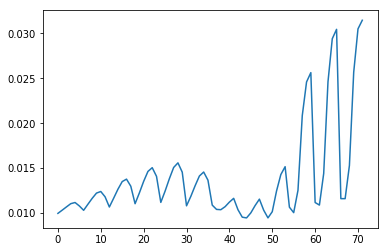

In [78]:
# Check
plt.plot(np.arange(72),mean_PhotonSim_Pars_mu[7,:])

In [18]:
point_grid =np.array([[0.0,0.0,0.0],[0.4,0.4,0.4],[0.8,0.8,0.8],[1.0,1.0,1.0]])#网格点坐标
point_grid.shape
def func(x, y, z):
    return x*(1-x)*np.cos(4*np.pi*x) * (np.sin(4*np.pi*y**2)**2)*z

points = np.random.rand(10, 3)#实际点坐标
values = func(points[:,0], points[:,1],points[:,2])#实际点的值
values.shape

(10,)

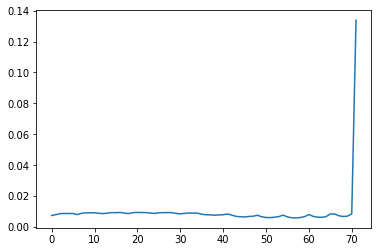

In [28]:
#check
data_Whole_Detector_kis.shape = 23*23*23,72
plt.plot(np.arange(72),data_Whole_Detector_kis[23*23*23 - 1,:])

In [76]:
data_Whole_Detector_kis.shape

(23, 23, 23, 72)

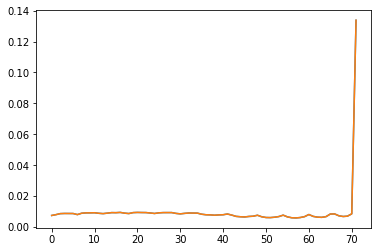

In [25]:
# Check
plt.plot(np.arange(72),data_Whole_Detector_kis_Interp[200*200*200 -1,:])
plt.plot(np.arange(72),data_Whole_Detector_kis[22,22,22,:])

In [51]:
df.iloc[:9]

,z,y,x
0,-9.95,-9.95,-9.95
1,-9.95,-9.95,-9.85
2,-9.95,-9.95,-9.75
3,-9.95,-9.95,-9.65
4,-9.95,-9.95,-9.55
5,-9.95,-9.95,-9.45
6,-9.95,-9.95,-9.35
7,-9.95,-9.95,-9.25
8,-9.95,-9.95,-9.15
